# Statistics review 12: Survival analysis

R code accompanying [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1065034/pdf/cc2955.pdf)

## Key learning points

- Analysis of time-to-event data
- Kaplan–Meier methods
- log rank test 
- Cox’s proportional hazards

In [3]:
suppressPackageStartupMessages(library(tidyverse))

In [17]:
options(repr.plot.width=4, repr.plot.height=3)

## Survival Data

In [18]:
pt <- 1:15
days <- c(1,1,4,5,6,8,9,9,12,15,22,25,37,55,72)
outcome <- c('d', 'd', 'd', 'd', NA, 'd', 's', 'd', 'd',
            NA, 'd', 's', 'd', 'd', 's')
treatment <- c(2,2,2,2,2,1,2,2,1,1,2,1,1,1,1)
age <- c(75,79,85,76,66,75,72,70,71,73,66,73,68,59,61)

df <- data.frame(pt=pt, days=days, outcome=outcome, treatment=treatment, age=age)
df

pt,days,outcome,treatment,age
1,1,d,2,75
2,1,d,2,79
3,4,d,2,85
4,5,d,2,76
5,6,NA,2,66
6,8,d,1,75
7,9,s,2,72
8,9,d,2,70
9,12,d,1,71
10,15,NA,1,73


## Estimating the survival curve using the Kaplan–Meier method

In [24]:
library(survival)
library(ggfortify)

In [20]:
df$surv <- with(df, Surv(days, outcome=='d'))

In [21]:
head(df)

pt,days,outcome,treatment,age,surv
1,1,d,2,75,1
2,1,d,2,79,1
3,4,d,2,85,4
4,5,d,2,76,5
5,6,NA,2,66,6?
6,8,d,1,75,8


### Overall 

In [30]:
km1 <- survfit(surv ~ 1, data=df)

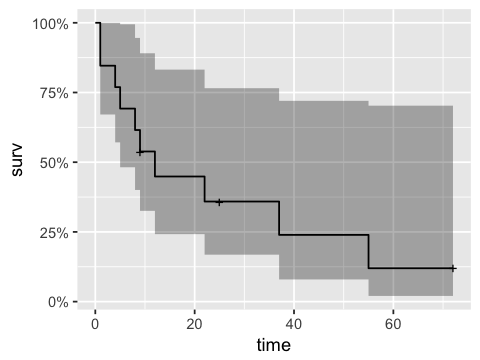

In [41]:
autoplot(km1)

### By treatment

In [32]:
km2 <- survfit(surv ~ treatment, data=df)

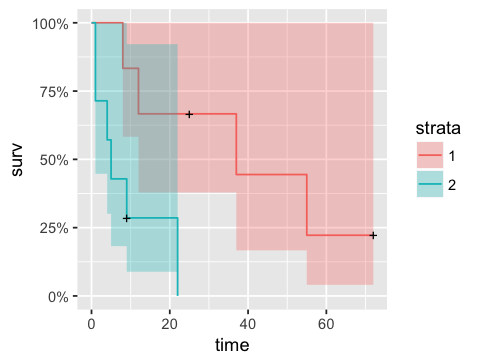

In [33]:
autoplot(km2)

### Plotting cumulative hazard

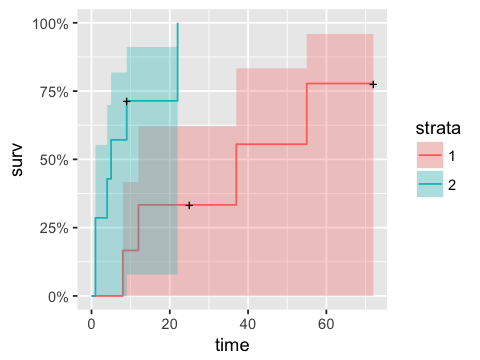

In [44]:
autoplot(km2, fun='event')

## Comparing survival curves of two groups using the log rank test

In [35]:
survdiff(surv ~ treatment, data=df)

Call:
survdiff(formula = surv ~ treatment, data = df)

n=13, 2 observations deleted due to missingness.

            N Observed Expected (O-E)^2/E (O-E)^2/V
treatment=1 6        4     6.99      1.28      5.27
treatment=2 7        6     3.01      2.98      5.27

 Chisq= 5.3  on 1 degrees of freedom, p= 0.0216 

## Cox’s proportional hazards model

### Treatment only

In [36]:
m1 <- coxph(surv ~ treatment, data=df)

In [37]:
summary(m1)

Call:
coxph(formula = surv ~ treatment, data = df)

  n= 13, number of events= 10 
   (2 observations deleted due to missingness)

            coef exp(coef) se(coef)    z Pr(>|z|)  
treatment 1.7603    5.8144   0.8465 2.08   0.0376 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
treatment     5.814      0.172     1.107     30.55

Concordance= 0.713  (se = 0.099 )
Rsquare= 0.327   (max possible= 0.948 )
Likelihood ratio test= 5.14  on 1 df,   p=0.02333
Wald test            = 4.32  on 1 df,   p=0.03756
Score (logrank) test = 5.28  on 1 df,   p=0.0216


### Treatment and age

In [38]:
m2 <- coxph(surv ~ treatment + age, data=df)

In [39]:
summary(m2)

Call:
coxph(formula = surv ~ treatment + age, data = df)

  n= 13, number of events= 10 
   (2 observations deleted due to missingness)

             coef exp(coef) se(coef)     z Pr(>|z|)  
treatment 1.65039   5.20901  0.96397 1.712   0.0869 .
age       0.21523   1.24015  0.08562 2.514   0.0119 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
treatment     5.209     0.1920    0.7875    34.458
age           1.240     0.8064    1.0486     1.467

Concordance= 0.868  (se = 0.118 )
Rsquare= 0.646   (max possible= 0.948 )
Likelihood ratio test= 13.5  on 2 df,   p=0.001173
Wald test            = 8.23  on 2 df,   p=0.01632
Score (logrank) test = 11.43  on 2 df,   p=0.003298


### Check for violation of proportional hazard (constant HR over time)

In [62]:
res <- cox.zph(m2)
res

            rho  chisq     p
treatment 0.110 0.0994 0.753
age       0.274 0.4489 0.503
GLOBAL       NA 0.5000 0.779

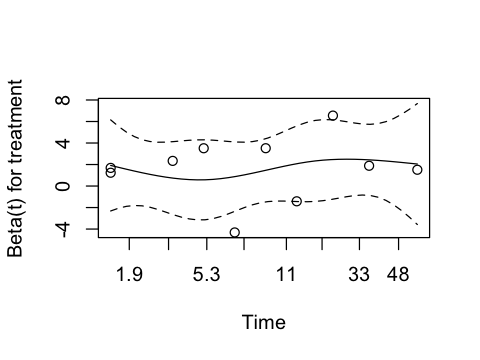

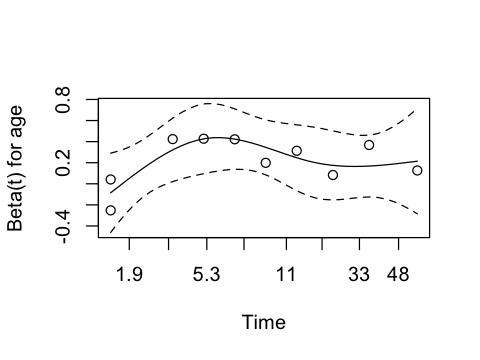

In [63]:
plot(res)

## Exercise

In [65]:
library(KMsurv)

In [68]:
data(tongue)

In [76]:
help(tongue)

In [69]:
head(tongue)

type,time,delta
1,1,1
1,3,1
1,3,1
1,4,1
1,10,1
1,13,1


**1**. Create a KM plot for the tongue data set.

**2**. Evaluate if the type of tumor affects survival using a log-rank test

**3**. Evaluate if the type of tumor affects survival using Cox PH test.

**4**. Check if the Cox PH assumptions are met.